# A* Pathfinding Algorithm Visualization
This notebook demonstrates the implementation of the A* pathfinding algorithm with visualization.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappush, heappop
import random


In [31]:
def create_random_maze(size=20, obstacle_density=0.3):
    """Create a random maze with given size and obstacle density"""
    maze = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if random.random() < obstacle_density and (i, j) not in [(0, 0), (size-1, size-1)]:
                maze[i, j] = 1
    return maze

def heuristic(a, b):
    """Calculate the Manhattan distance heuristic"""
    return abs(b[0] - a[0]) + abs(b[1] - a[1])


In [32]:
def get_neighbors(current, maze):
    """Get valid neighboring cells"""
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:  # right, down, left, up
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] == 0:
            neighbors.append((x, y))
    return neighbors

def a_star(maze, start, goal):
    """A* pathfinding algorithm implementation"""
    frontier = []
    heappush(frontier, (0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}

    while frontier:
        current = heappop(frontier)[1]

        if current == goal:
            break

        for next_pos in get_neighbors(current, maze):
            new_cost = cost_so_far[current] + 1
            if next_pos not in cost_so_far or new_cost < cost_so_far[next_pos]:
                cost_so_far[next_pos] = new_cost
                priority = new_cost + heuristic(goal, next_pos)
                heappush(frontier, (priority, next_pos))
                came_from[next_pos] = current

    # Reconstruct path
    current = goal
    path = []
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    path.reverse()

    return path if path[0] == start else []


In [33]:
def visualize_path(maze, path):
    """Visualize the maze and the found path"""
    plt.figure(figsize=(10, 10))

    # Plot the maze with a label
    maze_plot = plt.imshow(maze, cmap='binary', label='Maze')

    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], 'r-', linewidth=3, label='Path')
        plt.plot(path[0, 1], path[0, 0], 'go', label='Start', markersize=15)
        plt.plot(path[-1, 1], path[-1, 0], 'ro', label='Goal', markersize=15)
    else:
        # If no path exists, still show start and goal
        plt.plot(0, 0, 'go', label='Start', markersize=15)
        plt.plot(maze.shape[1]-1, maze.shape[0]-1, 'ro', label='Goal', markersize=15)

    plt.grid(True)
    # Create legend with unique labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.title("A* Pathfinding Visualization")
    plt.show()


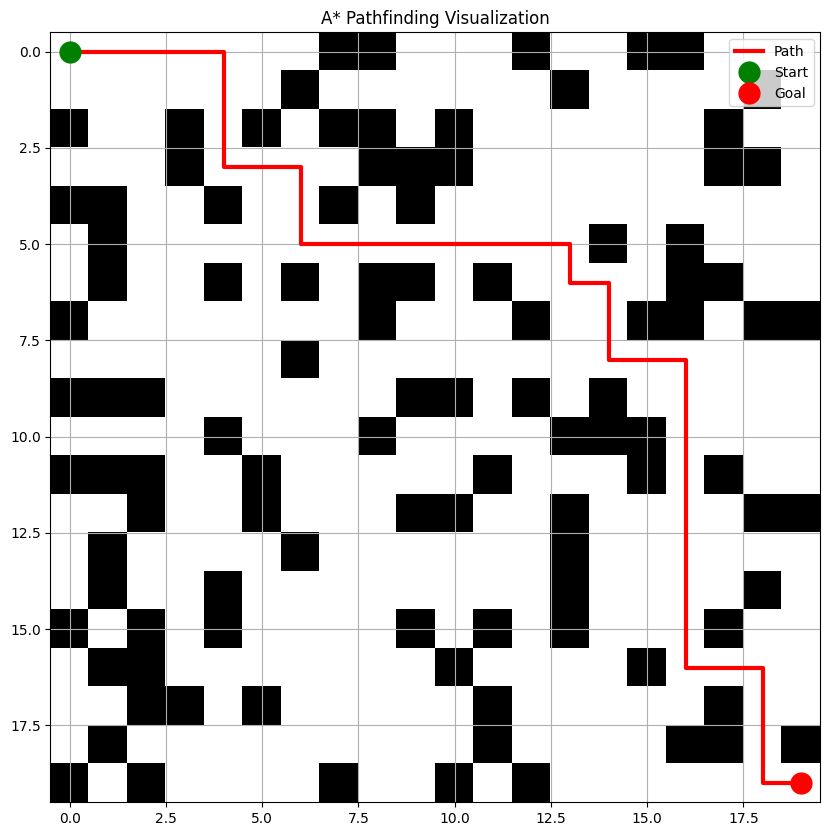

In [34]:
# Create a random maze and find path
size = 20
maze = create_random_maze(size=size)
start = (0, 0)
goal = (size-1, size-1)

# Find the path using A*
path = a_star(maze, start, goal)

# Visualize the result
visualize_path(maze, path)


# Explanation:
# - Black cells represent obstacles
# - White cells represent free space
# - Green dot is the start position
# - Red dot is the goal position
# - Red line shows the found path
# 
# If no path is shown, it means no valid path exists between start and goal positions due to obstacles.
# Try running the cell above multiple times to generate different random mazes!


# Binary Search Implementation
# This section demonstrates both iterative and recursive implementations of the binary search algorithm,
# along with visualization of the search process.


In [35]:
def binary_search_iterative(arr, target):
    """
    Iterative implementation of binary search
    Returns: (index, steps, search_history)
    """
    left, right = 0, len(arr) - 1
    steps = 0
    history = []

    while left <= right:
        steps += 1
        mid = (left + right) // 2
        history.append((left, mid, right))

        if arr[mid] == target:
            return mid, steps, history
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return -1, steps, history

def binary_search_recursive(arr, target, left=None, right=None, history=None):
    """
    Recursive implementation of binary search
    Returns: (index, steps, search_history)
    """
    if left is None:
        left = 0
        right = len(arr) - 1
        history = []

    if left > right:
        return -1, len(history), history

    mid = (left + right) // 2
    history.append((left, mid, right))

    if arr[mid] == target:
        return mid, len(history), history
    elif arr[mid] < target:
        return binary_search_recursive(arr, target, mid + 1, right, history)
    else:
        return binary_search_recursive(arr, target, left, mid - 1, history)


In [36]:
def visualize_binary_search(arr, target, history):
    """Visualize the binary search process"""
    plt.figure(figsize=(15, 6))

    # Plot array values
    plt.plot(range(len(arr)), arr, 'b-', label='Array')
    plt.scatter(range(len(arr)), arr, c='blue')

    # Highlight target
    plt.axhline(y=target, color='r', linestyle='--', label=f'Target: {target}')

    # Animation setup
    colors = plt.cm.RdYlGn(np.linspace(0, 1, len(history)))

    # Show search regions
    for i, (left, mid, right) in enumerate(history):
        alpha = (i + 1) / len(history)
        plt.axvspan(left, right, alpha=0.2 * alpha, color=colors[i], 
                   label=f'Step {i+1}: [{left}, {right}]')
        plt.scatter(mid, arr[mid], c=[colors[i]], s=100, zorder=5)

    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Binary Search Visualization')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()


Array: [np.int64(1), np.int64(1), np.int64(15), np.int64(23), np.int64(25), np.int64(26), np.int64(29), np.int64(33), np.int64(37), np.int64(39), np.int64(41), np.int64(43), np.int64(45), np.int64(57), np.int64(62), np.int64(78), np.int64(80), np.int64(83), np.int64(91), np.int64(97)]
Target: 41

Iterative Binary Search:
Found at index: 10
Steps taken: 4

Recursive Binary Search:
Found at index: 10
Steps taken: 4


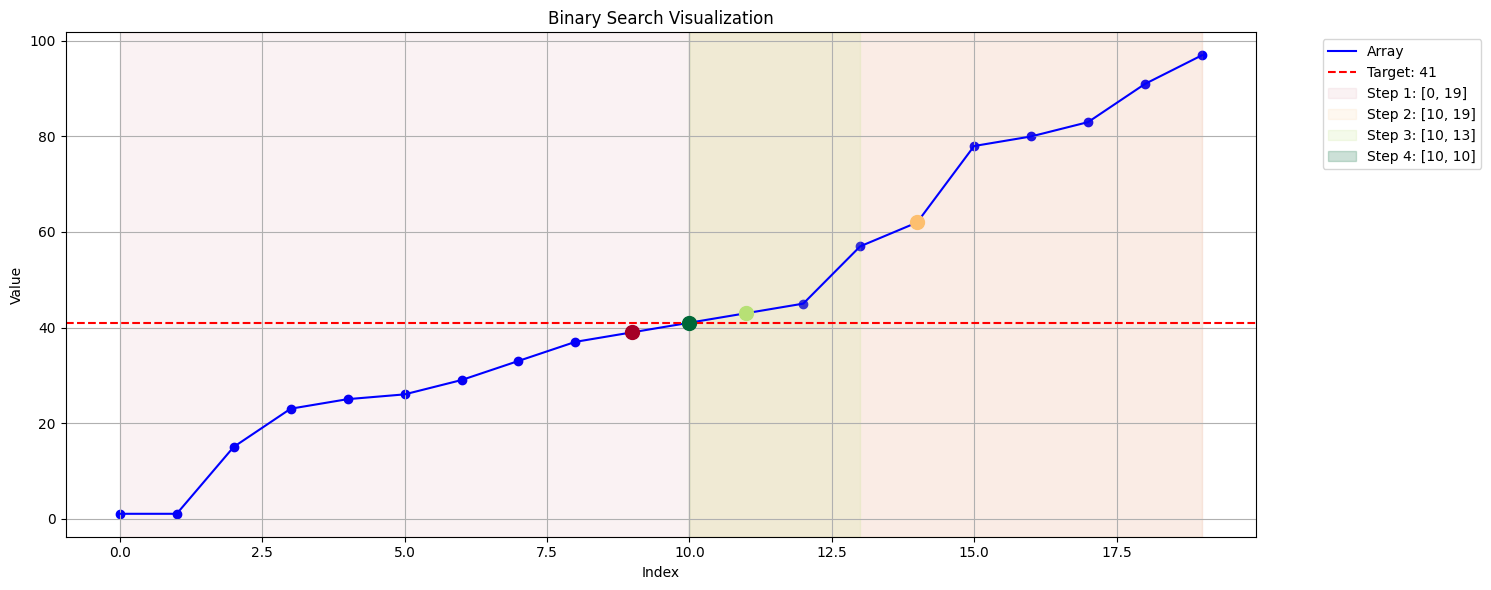

In [37]:
# Example usage
# Create a sorted array
arr = sorted(np.random.randint(1, 100, 20))
target = np.random.choice(arr)  # Choose a random target from the array

# Try both implementations
index_iter, steps_iter, history_iter = binary_search_iterative(arr, target)
index_rec, steps_rec, history_rec = binary_search_recursive(arr, target)

print(f"Array: {arr}")
print(f"Target: {target}")
print(f"\nIterative Binary Search:")
print(f"Found at index: {index_iter}")
print(f"Steps taken: {steps_iter}")
print(f"\nRecursive Binary Search:")
print(f"Found at index: {index_rec}")
print(f"Steps taken: {steps_rec}")

# Visualize the search process
visualize_binary_search(arr, target, history_iter)
